# Momentum / Contrarian

momentum = quantità di moto = massa per velocità

Vedere in OANDA o IBKR come funziona

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\Paolo\AppData\Local\Temp\ipykernel_2120\1123596123.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
# WITH OANDA
import tpqoa
api = tpqoa.tpqoa("oandaMY.cfg")

In [4]:
# WITH IBKR
# ib.disconnect()
import pandas as pd
from ib_insync import *
util.startLoop()  # not necessary in scripts
ib = IB()
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [6]:
# WITH OANDA
df = api.get_history(instrument = "EUR_USD", start = "2021-09-24", end = "2024-09-24", granularity = "H8", price = "M")
# we change the column names to match IBKR
df.rename(columns={"o":"open","h":"high","l":"low","c":"close","time":"date"},inplace=True)
df.index.names = ['date']
df = df.close.to_frame()
df.head(5)

close
date                        
2021-09-23 21:00:00  1.17372
2021-09-24 05:00:00  1.17066
2021-09-24 13:00:00  1.17206
2021-09-26 21:00:00  1.17224
2021-09-27 05:00:00  1.17073

In [7]:
# WITH IBKR
df = pd.DataFrame(ib.reqHistoricalData( Forex("EURUSD"), endDateTime = "20240924 00:00:00", 
                                  barSizeSetting="8 hours", durationStr="4 Y", 
                                  whatToShow= "MIDPOINT", useRTH = True, formatDate=2 )).set_index("date")
df.index=pd.to_datetime(df.index)
df = df.close.to_frame()
df.head(5)

close
date                              
2020-09-27 21:15:00+00:00  1.16340
2020-09-28 00:00:00+00:00  1.16295
2020-09-28 08:00:00+00:00  1.16600
2020-09-28 16:00:00+00:00  1.16640
2020-09-28 21:15:00+00:00  1.16770

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4140 entries, 2020-09-27 21:15:00+00:00 to 2024-09-23 21:15:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   4140 non-null   float64
dtypes: float64(1)
memory usage: 64.7 KB


<Axes: xlabel='date'>

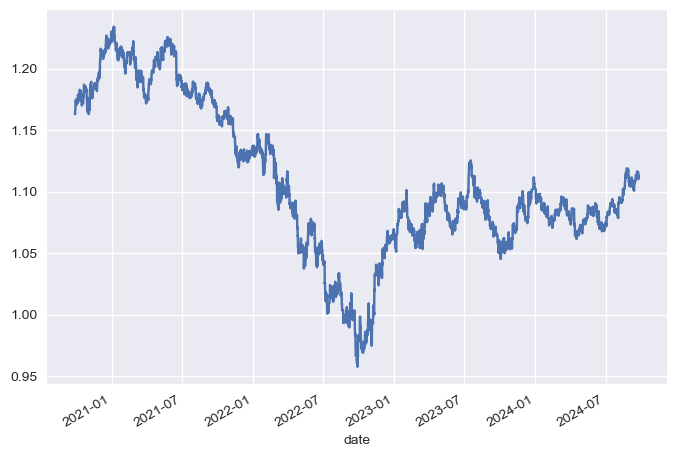

In [9]:
df.close.plot()

In [10]:
df["logRet"]=np.log(df.close/df.close.shift(1))

In [11]:
df.head()

close    logRet
date                                        
2020-09-27 21:15:00+00:00  1.16340       NaN
2020-09-28 00:00:00+00:00  1.16295 -0.000387
2020-09-28 08:00:00+00:00  1.16600  0.002619
2020-09-28 16:00:00+00:00  1.16640  0.000343
2020-09-28 21:15:00+00:00  1.16770  0.001114

In [12]:
df.dropna(inplace=True)
window=3
df["posizione"] = np.where( df["logRet"].rolling(window).mean() > 0 , +1 , -1  ) # momentum strategy
# df["posizione"] = np.sign( df["logRet"].rolling(window).mean() )

In [13]:
df.head(20)

close    logRet  posizione
date                                                   
2020-09-28 00:00:00+00:00  1.16295 -0.000387         -1
2020-09-28 08:00:00+00:00  1.16600  0.002619         -1
2020-09-28 16:00:00+00:00  1.16640  0.000343          1
2020-09-28 21:15:00+00:00  1.16770  0.001114          1
2020-09-29 00:00:00+00:00  1.16810  0.000342          1
2020-09-29 08:00:00+00:00  1.17165  0.003035          1
2020-09-29 16:00:00+00:00  1.17430  0.002259          1
2020-09-29 21:15:00+00:00  1.17415 -0.000128          1
2020-09-30 00:00:00+00:00  1.17330 -0.000724          1
2020-09-30 08:00:00+00:00  1.17220 -0.000938         -1
2020-09-30 16:00:00+00:00  1.17205 -0.000128         -1
2020-09-30 21:15:00+00:00  1.17235  0.000256         -1
2020-10-01 00:00:00+00:00  1.17365  0.001108          1
2020-10-01 08:00:00+00:00  1.17515  0.001277          1
2020-10-01 16:00:00+00:00  1.17440 -0.000638          1
2020-10-01 21:15:00+00:00  1.17440  0.000000          1
2020-10-02 00:00:00+00:00  1.17230 -0.001790         -1
2020-10-02 08:00:00+00:00  1.17060 -0.001451         -1
2020-10-02 16:00:00+00:00  1.17160  0.000854         -1
2020-10-04 21:15:00+00:00  1.17195  0.000299         -1

In [14]:
df["momentum"]=df.posizione.shift(1)*df.logRet
df["contrarian"]=-df.posizione.shift(1)*df.logRet
df.head(20)

close    logRet  posizione  momentum  contrarian
date                                                                         
2020-09-28 00:00:00+00:00  1.16295 -0.000387         -1       NaN         NaN
2020-09-28 08:00:00+00:00  1.16600  0.002619         -1 -0.002619    0.002619
2020-09-28 16:00:00+00:00  1.16640  0.000343          1 -0.000343    0.000343
2020-09-28 21:15:00+00:00  1.16770  0.001114          1  0.001114   -0.001114
2020-09-29 00:00:00+00:00  1.16810  0.000342          1  0.000342   -0.000342
2020-09-29 08:00:00+00:00  1.17165  0.003035          1  0.003035   -0.003035
2020-09-29 16:00:00+00:00  1.17430  0.002259          1  0.002259   -0.002259
2020-09-29 21:15:00+00:00  1.17415 -0.000128          1 -0.000128    0.000128
2020-09-30 00:00:00+00:00  1.17330 -0.000724          1 -0.000724    0.000724
2020-09-30 08:00:00+00:00  1.17220 -0.000938         -1 -0.000938    0.000938
2020-09-30 16:00:00+00:00  1.17205 -0.000128         -1  0.000128   -0.000128
2020-09-30 21:15:00+00:00  1.17235  0.000256         -1 -0.000256    0.000256
2020-10-01 00:00:00+00:00  1.17365  0.001108          1 -0.001108    0.001108
2020-10-01 08:00:00+00:00  1.17515  0.001277          1  0.001277   -0.001277
2020-10-01 16:00:00+00:00  1.17440 -0.000638          1 -0.000638    0.000638
2020-10-01 21:15:00+00:00  1.17440  0.000000          1  0.000000   -0.000000
2020-10-02 00:00:00+00:00  1.17230 -0.001790         -1 -0.001790    0.001790
2020-10-02 08:00:00+00:00  1.17060 -0.001451         -1  0.001451   -0.001451
2020-10-02 16:00:00+00:00  1.17160  0.000854         -1 -0.000854    0.000854
2020-10-04 21:15:00+00:00  1.17195  0.000299         -1 -0.000299    0.000299

In [15]:
df[["logRet","momentum","contrarian"]].sum()

logRet       -0.045951
momentum      0.058257
contrarian   -0.058257
dtype: float64

In [1]:
(df[["logRet","momentum","contrarian"]].cumsum().cummax()-df[["momentum","contrarian"]].cumsum()).max()

NameError: name 'df' is not defined

<Axes: xlabel='date'>

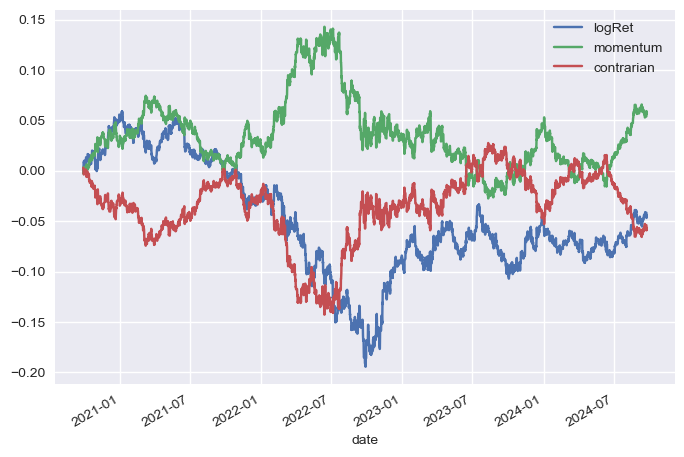

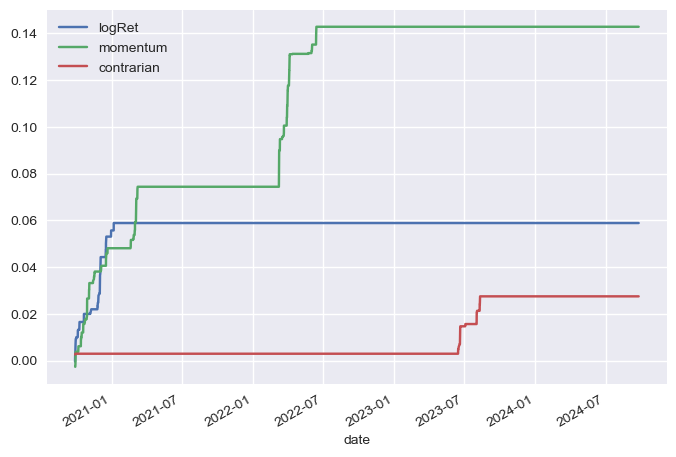

In [17]:
df[["logRet","momentum","contrarian"]].cumsum().plot()
df[["logRet","momentum","contrarian"]].cumsum().cummax().plot()

# Ottimizzare la strategia

In [18]:
results= ["logRet"]
for w in list(range(1,11)):
    df["posizione"+str(w)] = np.where( df["logRet"].rolling(w).mean() > 0 , +1 , -1  ) # momentum strategy
    df["momentum"+str(w)]=df["posizione"+str(w)].shift(1)*df.logRet
    df["contrarian"+str(w)]=-df["posizione"+str(w)].shift(1)*df.logRet
    results.append("momentum"+str(w))
    results.append("contrarian"+str(w))
    

In [19]:
results

['logRet',
 'momentum1',
 'contrarian1',
 'momentum2',
 'contrarian2',
 'momentum3',
 'contrarian3',
 'momentum4',
 'contrarian4',
 'momentum5',
 'contrarian5',
 'momentum6',
 'contrarian6',
 'momentum7',
 'contrarian7',
 'momentum8',
 'contrarian8',
 'momentum9',
 'contrarian9',
 'momentum10',
 'contrarian10']

In [20]:
df[results].sum()

logRet         -0.045951
momentum1       0.000337
contrarian1    -0.000337
momentum2      -0.076817
contrarian2     0.076817
momentum3       0.058257
contrarian3    -0.058257
momentum4       0.013765
contrarian4    -0.013765
momentum5      -0.077183
contrarian5     0.077183
momentum6       0.002161
contrarian6    -0.002161
momentum7       0.086445
contrarian7    -0.086445
momentum8      -0.140311
contrarian8     0.140311
momentum9      -0.155661
contrarian9     0.155661
momentum10     -0.164601
contrarian10    0.164601
dtype: float64

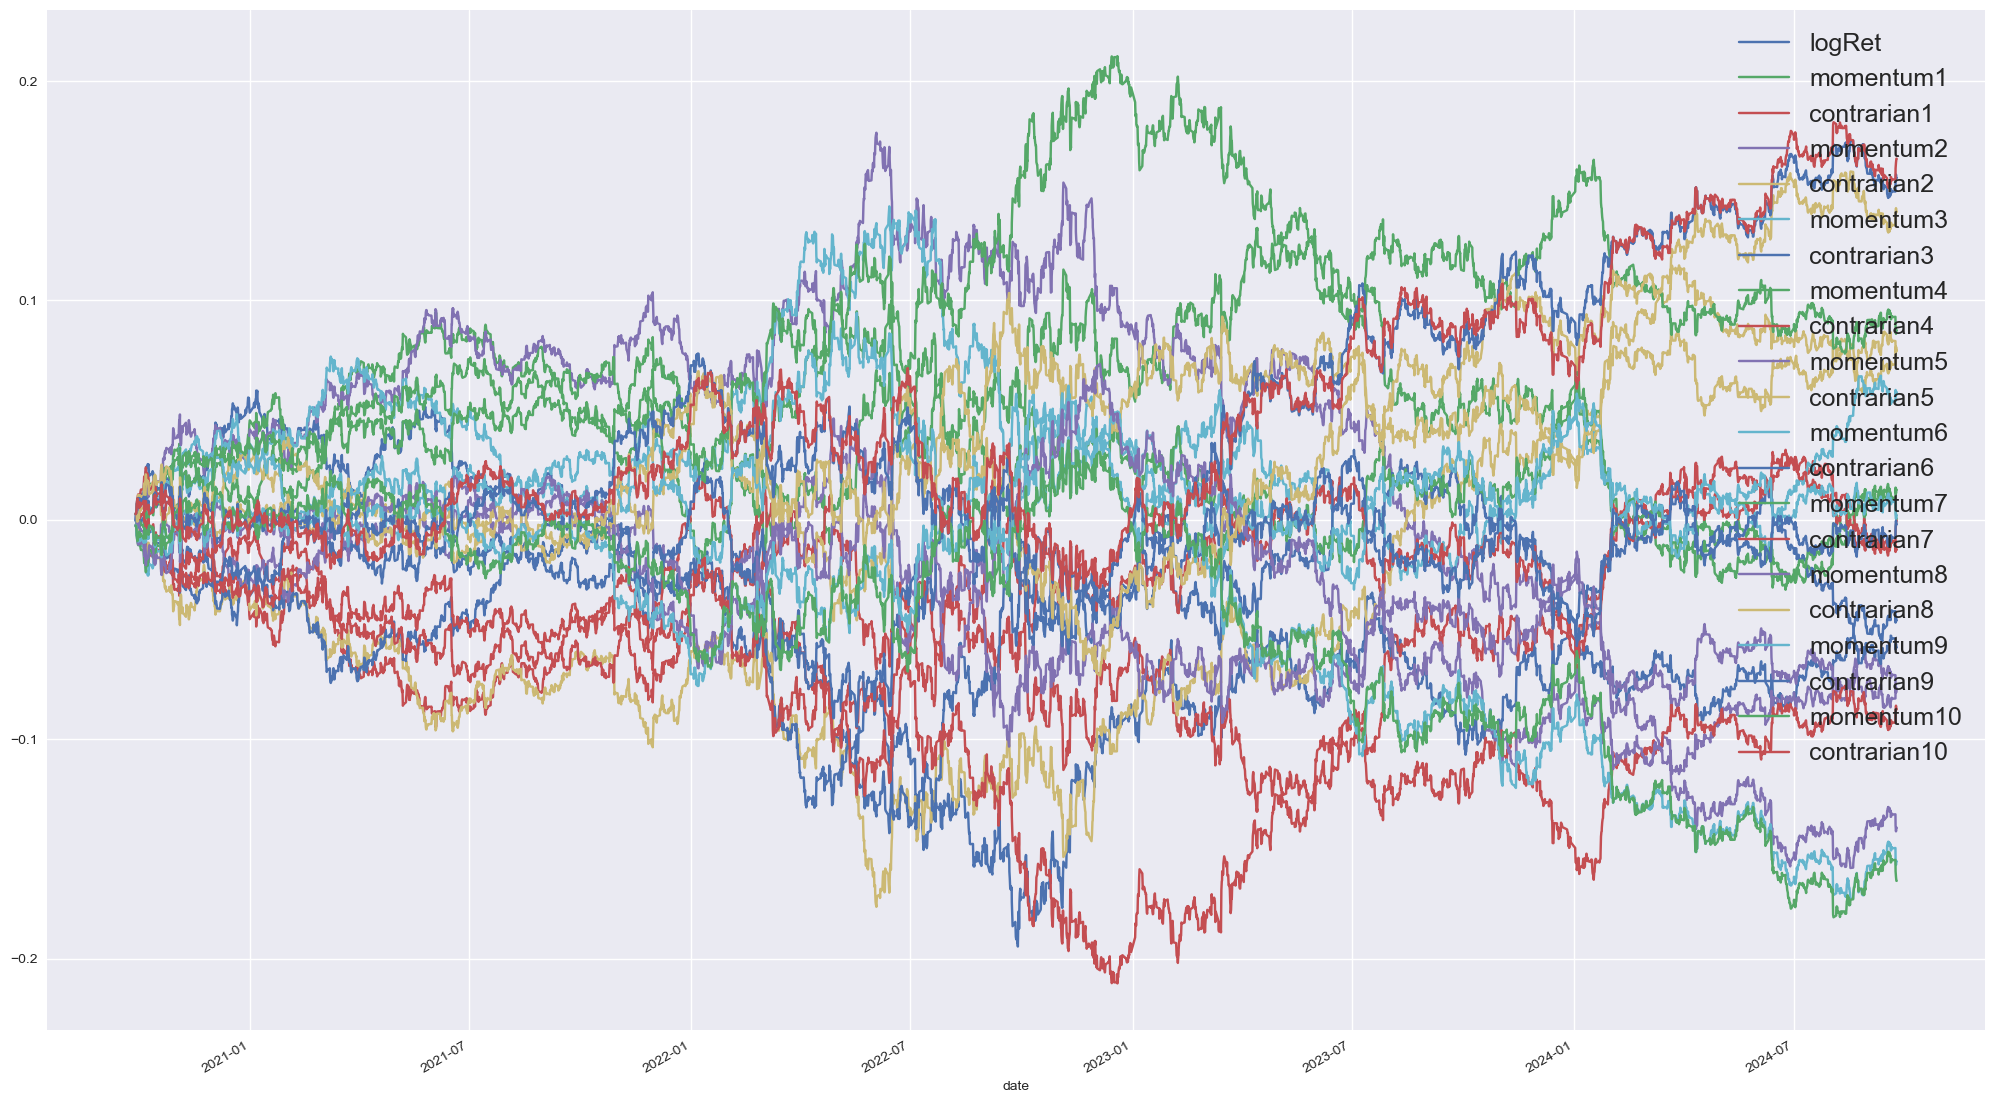

In [21]:
df[results].cumsum().plot(figsize=(25,15))
plt.legend(fontsize=18)

# Costi di trading

Abbiamo due costi di trading. 
1. una commissione che viene caricata dal broker. Questa solitamente è in percentuale ma con un minimo e un massimo, ad esempio 0.15% del controvalore acquistato con un minimo di 2 euro e un massimo di 18 euro. 
2. il fatto che in teoria noi dovremmo sempre comprare al prezzo ask e vendere al prezzo bid. Però per semplicità abbiamo considerato sempre il prezzo bid. Ad ogni transazione ci perdiamo mezzo spread. Consideriamo però che nelle strategie in cui non c'è la posizione neutrale ma si passa da quella long a quella short e viceversa sono di fatto due transazioni e quindi ad ogni cambio perdiamo l'intero spread

Come li calcoliamo:
1. Per questo costo prevediamo una percentuale senza considerare minimi e massimi che rendono i calcoli dipendenti da quanto stiamo investendo. Al momento ne teniamo conto nelle formula usando la variabile comm, ma la mettiamo a 0. 
2. Per questo costo consideriamo che lo spread medio su euro dollaro è di 0.00011 dollari e lo dividiamo per il prezzo medio dell'euro in dollari, in modo da ottenere il costo in percentuale.

In [26]:
comm=0.0
spread=0.00002/df.close.mean() 
# attenzione che 0.00011 è in dollari e df.close è in dollari. Ottimo. 
# Controllare sempre che i termini del rapporto usino la stessa unità di misura!

In [27]:
spread

1.8051476758211222e-05

Questi costi scattano tutte le volte in cui facciamo una transazione. Confrontiamo la posizione (spostata di 1 giorno) con quella precedente (spostata di 2 giorni). 

In [28]:
df["transazioni1"]=np.where(df["posizione1"].shift(1)!=df["posizione1"].shift(2),2,0)

In [29]:
df["transazioni1"].sum()*(spread/2+comm)

0.03769148347114503

In [30]:
results= ["CSlogRet"]
df["CSlogRet"]=df.logRet.cumsum()
for w in list(range(1,11)):
    df["posizione"+str(w)] = np.where( df["logRet"].rolling(w).mean() > 0 , +1 , -1  ) # momentum strategy
    df["transazioni"+str(w)]=np.where(df["posizione1"].shift(1)!=df["posizione1"].shift(2),+2,0)
    df["momentum"+str(w)]=df["posizione"+str(w)].shift(1)*df.logRet
    df["contrarian"+str(w)]=-df["posizione"+str(w)].shift(1)*df.logRet
    df["CSmomentum"+str(w)]=df["momentum"+str(w)].cumsum()-df["transazioni"+str(w)].cumsum()*(comm+spread/2)
    df["CScontrarian"+str(w)]=df["contrarian"+str(w)].cumsum()-df["transazioni"+str(w)].cumsum()*(comm+spread/2)
    # non è esatto togliere la transazione dal logRet, andrebbe tolta dal simpleRet. Ma essendo numeri molto
    # piccoli come approssimazione va bene
    results.append("CSmomentum"+str(w))
    results.append("CScontrarian"+str(w))

<Axes: xlabel='date'>

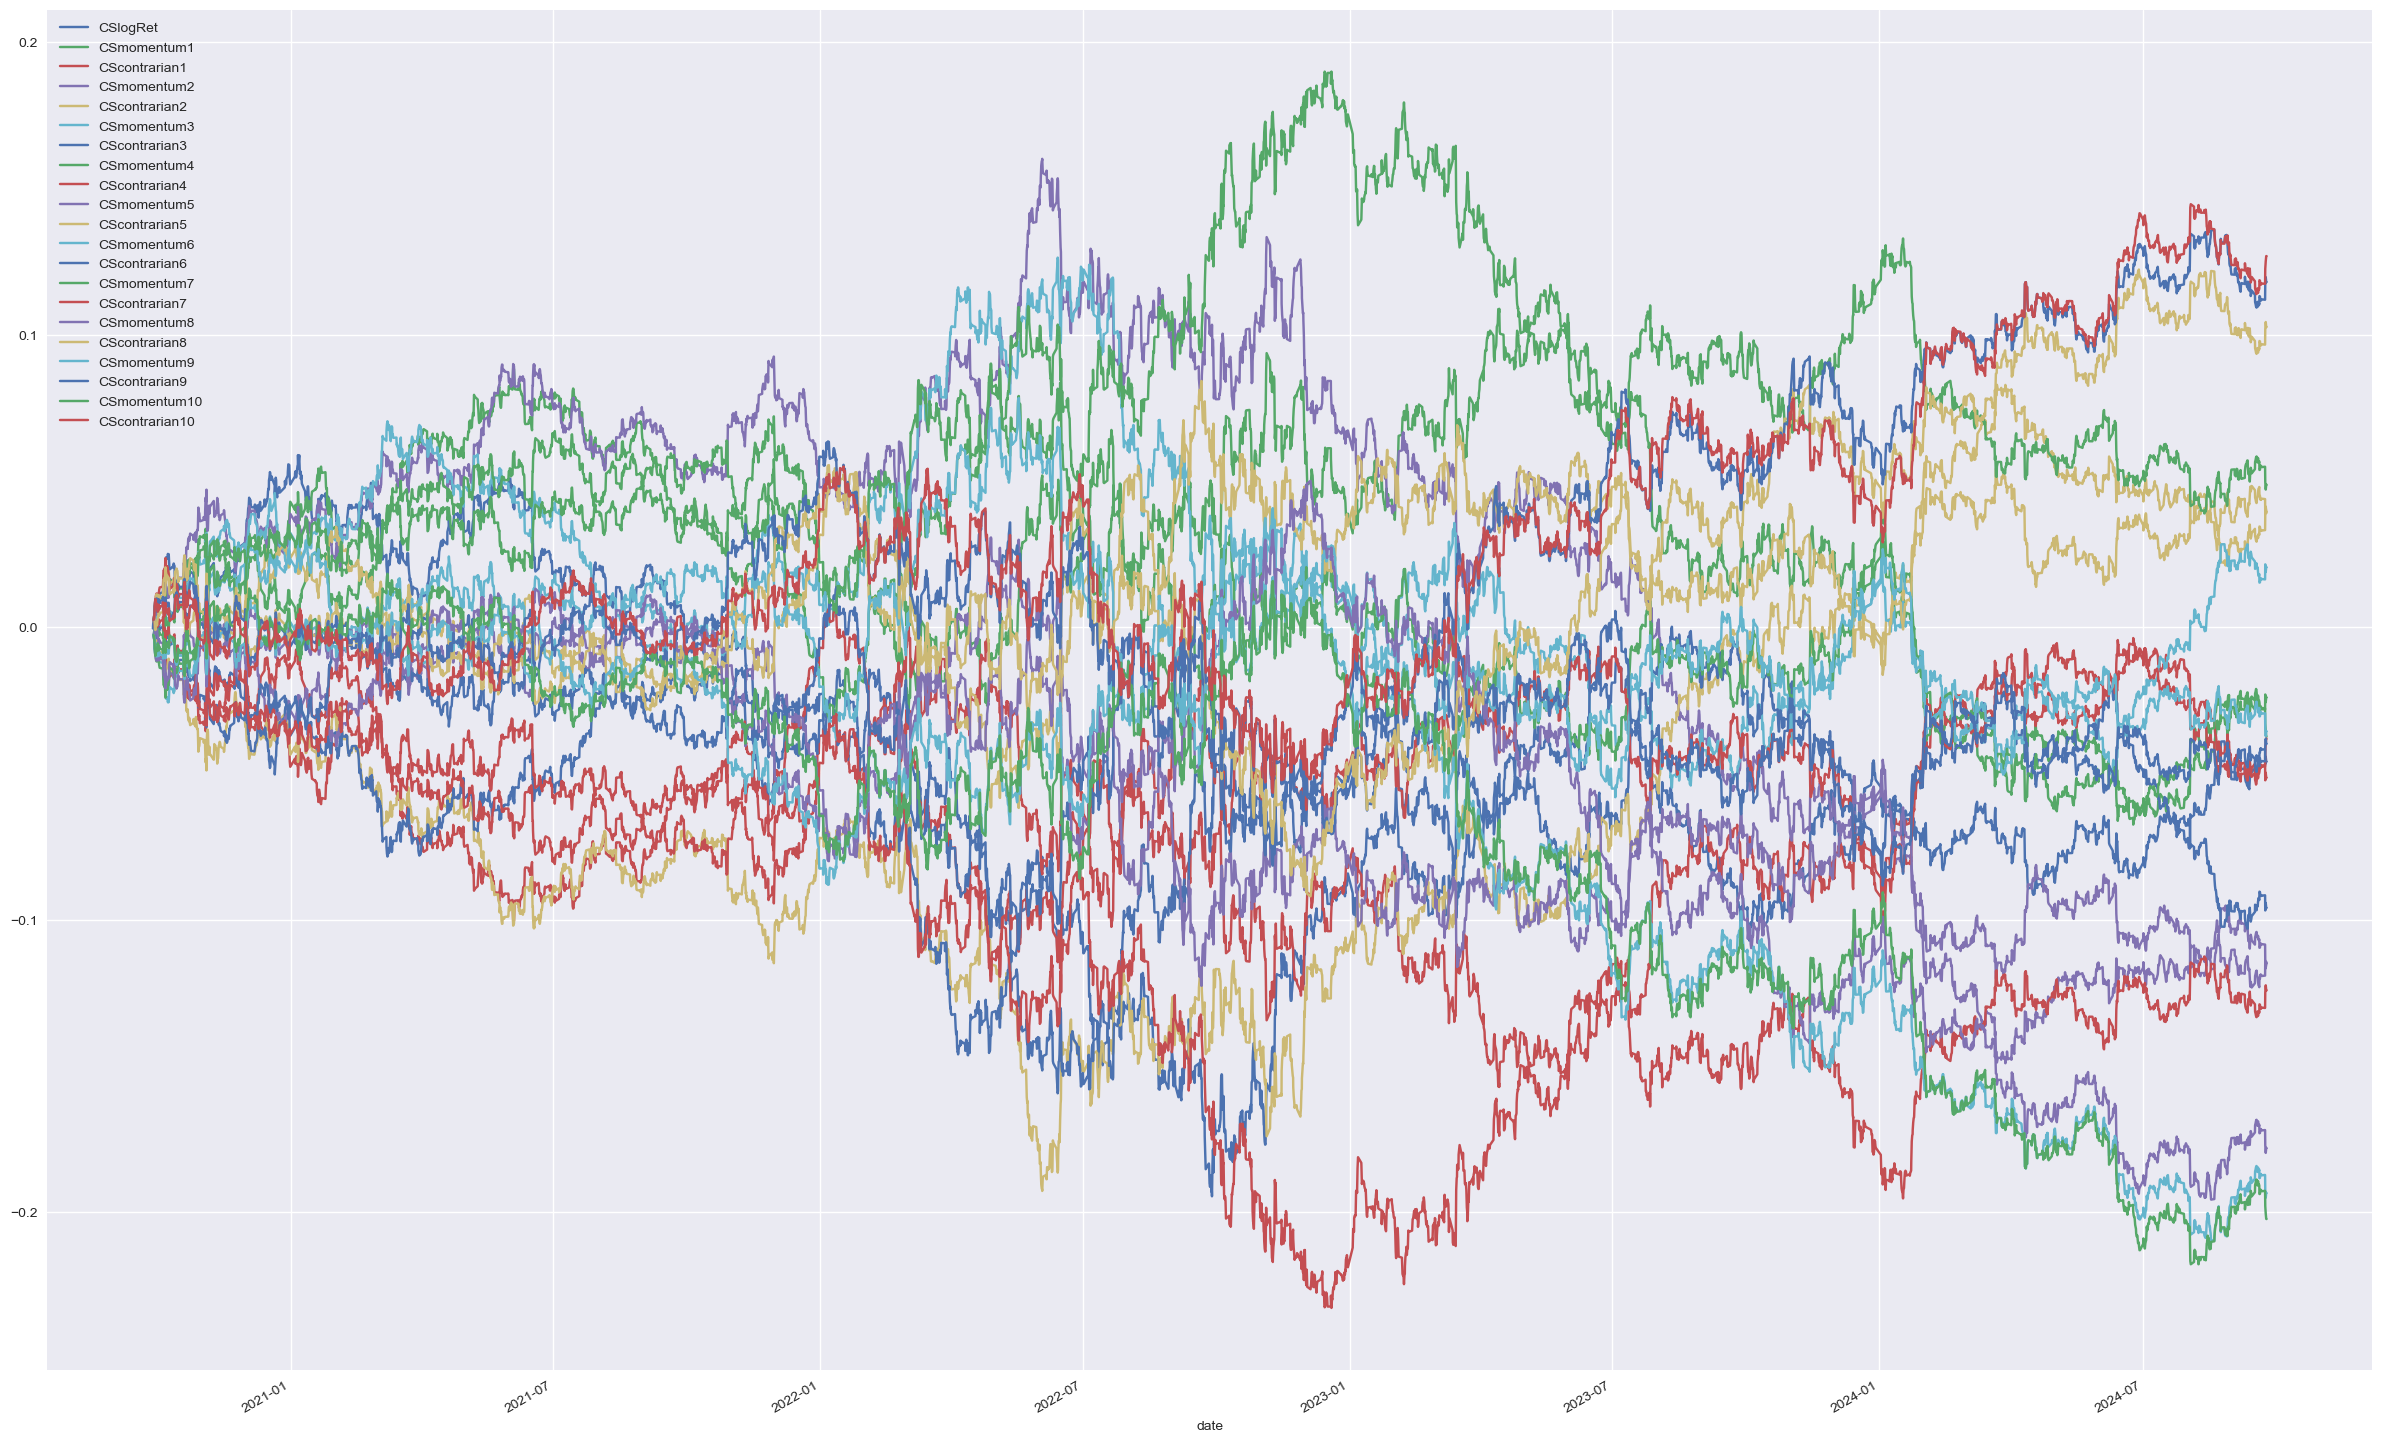

In [31]:
df[results].plot(figsize=(30,20))

In [32]:
results= ["CSlogRet"]
df["CSlogRet"]=df.logRet.cumsum()
for w in list(range(1,11)):
    df["posizione"+str(w)] = np.where( df["logRet"].rolling(w).mean() > 0 , +1 , -1  ) # momentum strategy
    df["transazioni"+str(w)]=np.where(df["posizione1"].shift(1)!=df["posizione1"].shift(2),+1,0)
    df["momentum"+str(w)]=df["posizione"+str(w)].shift(1)*df.logRet
    df["contrarian"+str(w)]=-df["posizione"+str(w)].shift(1)*df.logRet
#    df["CSmomentum"+str(w)]=df["momentum"+str(w)].cumsum()-df["transazioni"+str(w)].cumsum()*(comm+spread)
#    df["CScontrarian"+str(w)]=df["contrarian"+str(w)].cumsum()-df["transazioni"+str(w)].cumsum()*(comm+spread)
    # non è esatto togliere la transazione dal logRet, andrebbe tolta dal simpleRet. Ma essendo numeri molto
    # piccoli come approssimazione va bene
#    results.append("CSmomentum"+str(w))
#    results.append("CScontrarian"+str(w))
    print("momentum"+str(w),round(np.exp(df["momentum"+str(w)].sum())-df["transazioni"+str(w)].sum()*(comm+spread),5))
    print("contrarian"+str(w),round(np.exp(df["contrarian"+str(w)].sum())-df["transazioni"+str(w)].sum()*(comm+spread),5))
print("buy and hold",round(np.exp(df["CSlogRet"].iloc[-1]),5))

momentum1 0.96265
contrarian1 0.96197
momentum2 0.88837
contrarian2 1.04215
momentum3 1.0223
contrarian3 0.90572
momentum4 0.97617
contrarian4 0.94864
momentum5 0.88803
contrarian5 1.04255
momentum6 0.96447
contrarian6 0.96015
momentum7 1.0526
contrarian7 0.87949
momentum8 0.8314
contrarian8 1.11294
momentum9 0.81816
contrarian9 1.13074
momentum10 0.81054
contrarian10 1.14123
buy and hold 0.95509


In [37]:
comm=0.0002 # commissions of IBKR is 0.00002 with a minimum of 2 USD (which means at least 100k to have 0.00002), we make 0,0002 for 10k
results= ["CSlogRet"]
df["CSlogRet"]=df.logRet.cumsum()
for w in list(range(1,11)):
    df["posizione"+str(w)] = np.where( df["logRet"].rolling(w).mean() > 0 , +1 , -1  ) # momentum strategy
    df["transazioni"+str(w)]=np.where(df["posizione1"].shift(1)!=df["posizione1"].shift(2),+1,0)
    df["momentum"+str(w)]=df["posizione"+str(w)].shift(1)*df.logRet
    df["contrarian"+str(w)]=-df["posizione"+str(w)].shift(1)*df.logRet
#    df["CSmomentum"+str(w)]=df["momentum"+str(w)].cumsum()-df["transazioni"+str(w)].cumsum()*(comm+spread)
#    df["CScontrarian"+str(w)]=df["contrarian"+str(w)].cumsum()-df["transazioni"+str(w)].cumsum()*(comm+spread)
    # non è esatto togliere la transazione dal logRet, andrebbe tolta dal simpleRet. Ma essendo numeri molto
    # piccoli come approssimazione va bene
#    results.append("CSmomentum"+str(w))
#    results.append("CScontrarian"+str(w))
    print("momentum"+str(w),round(np.exp(df["momentum"+str(w)].sum())-df["transazioni"+str(w)].sum()*(comm+spread),5))
    print("contrarian"+str(w),round(np.exp(df["contrarian"+str(w)].sum())-df["transazioni"+str(w)].sum()*(comm+spread),5))
print("buy and hold",round(np.exp(df["CSlogRet"].iloc[-1]),5))

momentum1 0.54505
contrarian1 0.54437
momentum2 0.47077
contrarian2 0.62455
momentum3 0.6047
contrarian3 0.48812
momentum4 0.55857
contrarian4 0.53104
momentum5 0.47043
contrarian5 0.62495
momentum6 0.54687
contrarian6 0.54255
momentum7 0.635
contrarian7 0.46189
momentum8 0.4138
contrarian8 0.69534
momentum9 0.40056
contrarian9 0.71314
momentum10 0.39294
contrarian10 0.72363
buy and hold 0.95509


In [38]:
ib.disconnect()